# Project: 01-2024 LaborDE Analysis
## Author: Nadia Ordonez
## Step 7 LD German GDP Time series analysis

* [1. Introduction](#1.-Introduction)
* [2. Importing data](#2.-Importing-data)  
    * [2.1 Importing libraries](#2.1-Importing-libraries) 
    * [2.2 Importing dataframe](#2.2-Importing-dataframe)
* [3. Data wrangling](#3.-Data-wrangling)
* [4. Time series analysis](#4.-Time-series-analysis)
    * [4.1 Decomposition](#4.1-Decomposition) 
    * [4.2 Testing for stationarity](#4.2-Testing-for-stationarity)
    * [4.3 Stationarizing data](#4.3-Stationarizing-data)
* [5. Data driven insights](#5.-Data-driven-insights)

# 1. Introduction

This script provides an overview of a time series data analysis and forecasting project, constituting just one part of the complete endeavor. Time series data is essentially information organized based on its chronological occurrence. It involves a temporal variable (the independent variable) that records observations at regular time intervals, be it annual, monthly, weekly, hourly, or any consistent timeframe. This structure offers insights into the evolution of the dependent variable (or "result" variable) over time.

For this specific exercise, the focus is on the annual Gross Domestic Product (GDP) data for Germany. Gross Domestic Product is a key economic indicator that quantifies the total value of goods and services produced within a country's borders over a specific period. The script aims to analyze and prepare this annual GDP data for Germany in the context of a forecasting project.

# 2. Importing data

## 2.1 Importing libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## 2.2 Importing dataframe

The data was downloaded from [The World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=DE) and contains yearly GDP data in US dollars from 1970 until 2022 for Germany.

In [3]:
# Define path
path = r'C:\Users\Ich\Documents\01_2024_LaborDE_analysis'

In [4]:
# Import df
data = pd.read_csv(os.path.join(path,'02_Data', 'Original_data', 'GDP_Germany.csv'))

In [5]:
data.columns

Index(['Year', 'GDP_USdollars'], dtype='object')

In [6]:
data.head()

,Year,GDP_USdollars
0,1970,2.160000e+11
1,1971,2.500000e+11
2,1972,3.000000e+11
3,1973,3.980000e+11
4,1974,4.450000e+11


In [7]:
data.dtypes

Year               int64
GDP_USdollars    float64
dtype: object

In [8]:
data.shape

(53, 2)

# 3. Data wrangling

In [9]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y', errors='coerce')
data.set_index('Year', inplace=True)

In [10]:
data.head()

,GDP_USdollars
Year,
1970-01-01,2.160000e+11
1971-01-01,2.500000e+11
1972-01-01,3.000000e+11
1973-01-01,3.980000e+11
1974-01-01,4.450000e+11


In [11]:
data.shape

(53, 1)

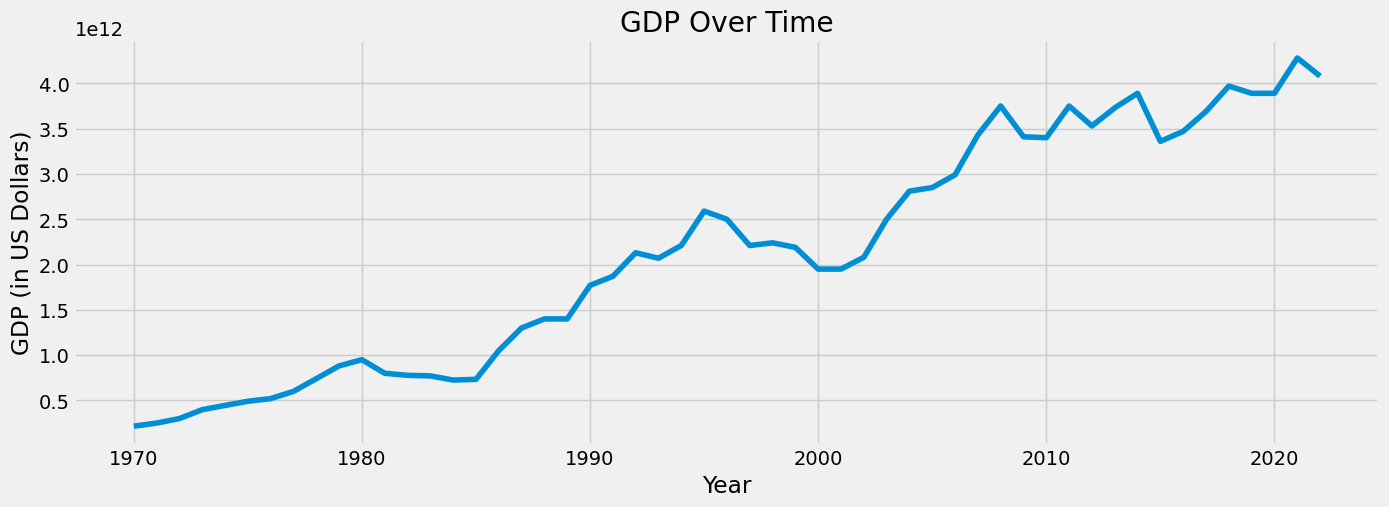

In [12]:
# Plot the data using matplotlib.

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data.index, data['GDP_USdollars'])  # Use data.index as x-axis
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in US Dollars)')
# Save the cluster plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visuals', 'gdp_bavaria_non_stationary.png'))

# Display the plot
plt.show()
# GDP is of a linear upwards trend, with ups and downs from 1980 until the most recent data 

In [13]:
# Basic statistics
data.describe()

,GDP_USdollars
count,5.300000e+01
mean,2.135415e+12
std,1.280318e+12
min,2.160000e+11
25%,8.000000e+11
50%,2.130000e+12
75%,3.410000e+12
max,4.280000e+12


In [14]:
# Check for missing values
data.isnull().sum() # no missing values

GDP_USdollars    0
dtype: int64

# 4. Time series analysis

## 4.1 Decomposition

In [15]:
# NOTE: In the GDP data being used for this example, the numbers are yearly rates (rather than daily or hourly), 
# so there’s no need for smoothing our data.
# Decompose the time series using an additive model
# additive model is preferred since the data trend is generally linear
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts
rcParams['figure.figsize'] = 18, 7

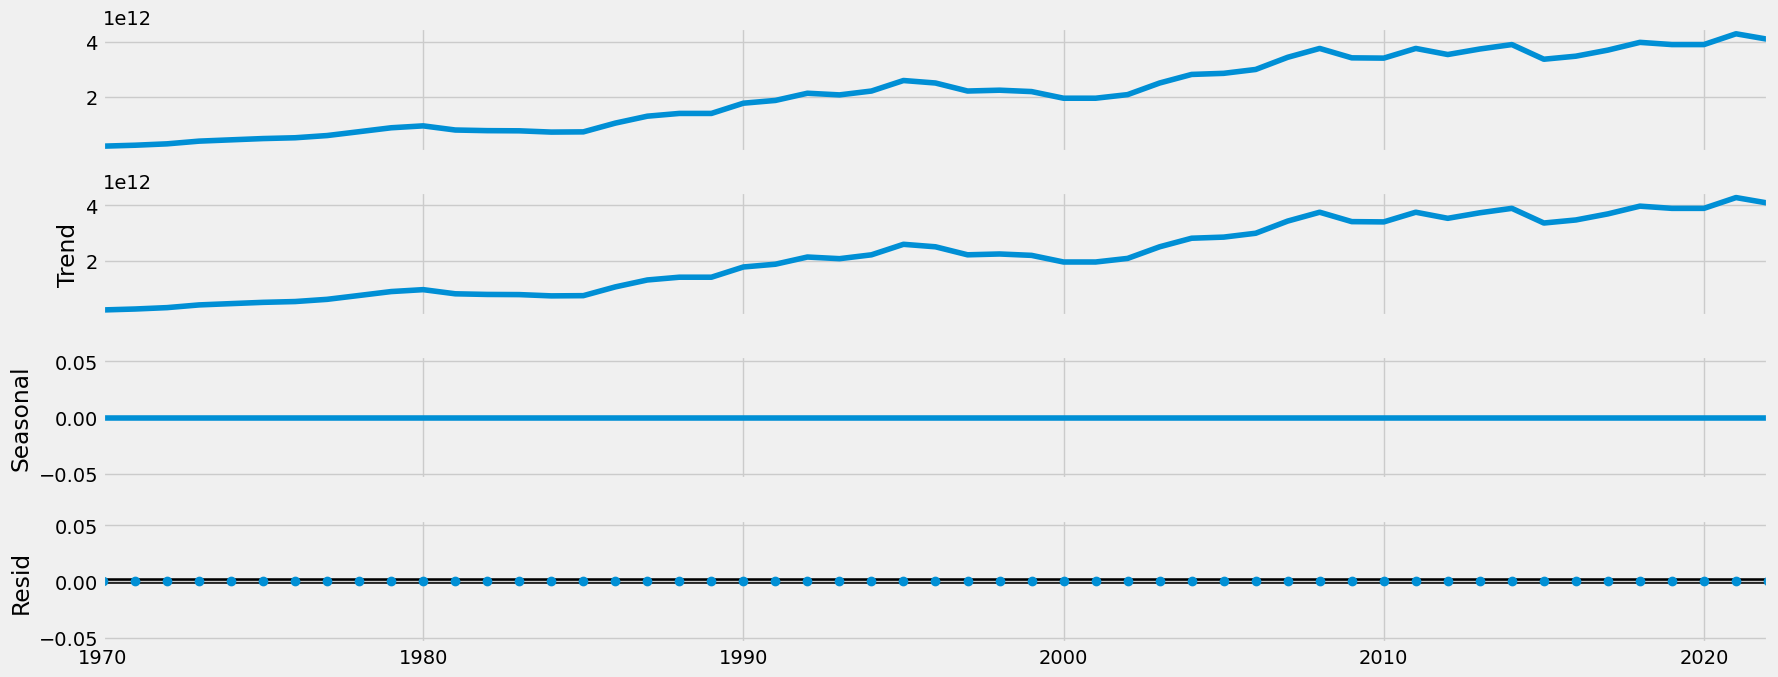

In [17]:
# Plot the separate components
decomposition.plot()

# Save the decomposition plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visuals', 'decomposition_gdp_bavaria_non_stationary.png'))

# Display the plot
plt.show()

# OBSERVATIONS
# The level: As GDP data doesn’t have much noise (and, thus, didn’t need to be smoothed), the level and trend appear the same
# The trend: The trend gradually increases in a linear fashion with ups and downs up until the most recent data
# The seasonality: There is no clear or significant seasonal pattern in the data
# The noise: There isn’t much unexplained noise (and, thus, didn’t need to be smoothed) 

The presence of a trend implies that this GDP series is non-stationary.

## 4.2 Testing for stationarity

In [18]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['GDP_USdollars'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.541649
p-value                         0.883630
Number of Lags Used             0.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


The test statistic (-0.54) is larger than the critical value (5% = -3.56), thus I can’t reject null hypothesis. The null hypothesis is that there is a unit root. A unit root is any random jump that can’t be explained by variation in the data. Additionally, the test result is NOT significant, since the p-value is greater than 0.05. The GDP is no-stationary.

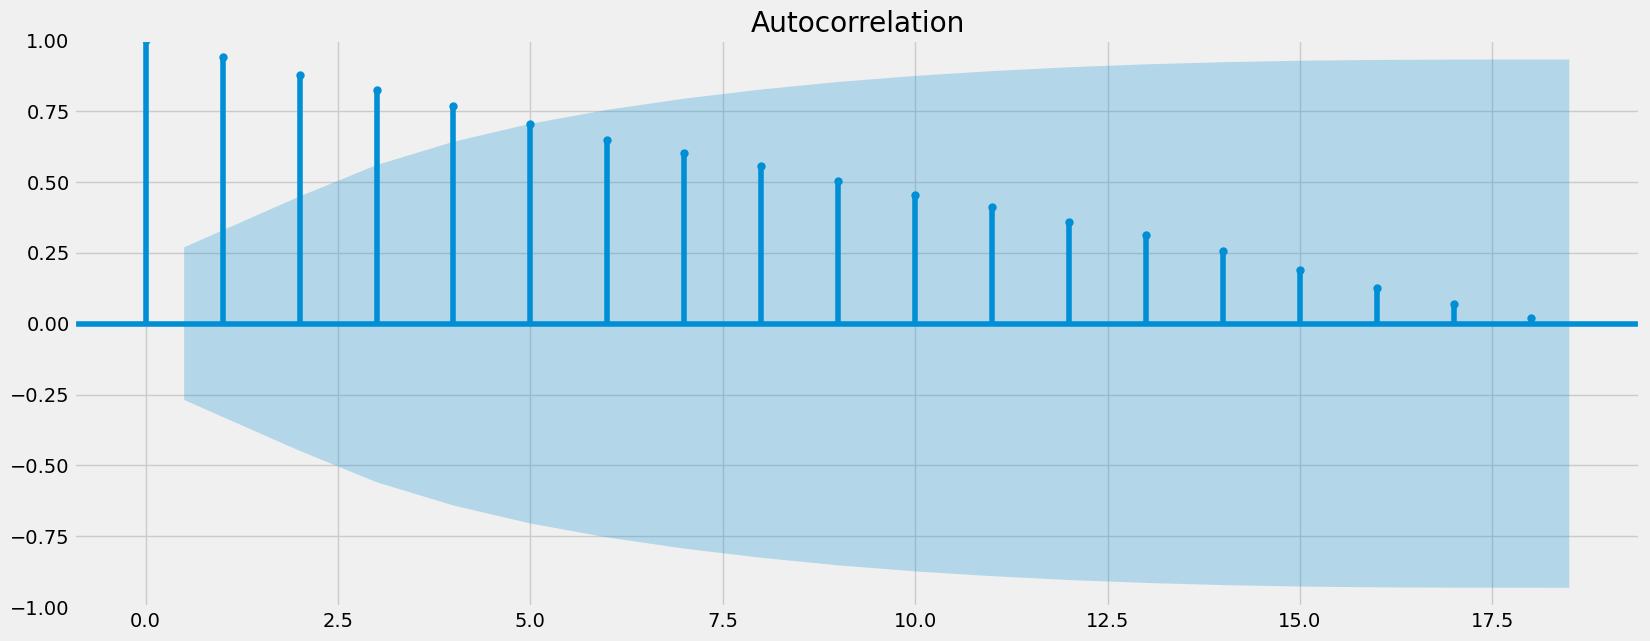

In [19]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(data)
# Save the decomposition plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visuals', 'autocorrelation_gdp_bavaria_non_stationary.png'))

# Display the plot
plt.show()


In this autocorrelation test, only five lines extend beyond the blue edge of the confidence interval, indicating that there are some lags with significant correlations. While a common rule of thumb suggests that ten such lines outside the confidence interval may signify non-stationarity, it's noteworthy that despite this observation, the Dickey-Fuller test did not support the hypothesis of my data being non-stationary. Therefore, the overall conclusion is that the data is stationary, despite the limited evidence of correlation in the autocorrelation plot.

## 4.3 Stationarizing data

### The differencing technique

In [20]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data - data.shift(1) 

In [21]:
# Removing the missing values that came about as a result of the differencing
# these values should be removed before running the Dickey-Fuller test
data_diff.dropna(inplace = True) 

In [22]:
data_diff.head()

,GDP_USdollars
Year,
1971-01-01,3.400000e+10
1972-01-01,5.000000e+10
1973-01-01,9.800000e+10
1974-01-01,4.700000e+10
1975-01-01,4.600000e+10


In [23]:
data_diff.columns

Index(['GDP_USdollars'], dtype='object')

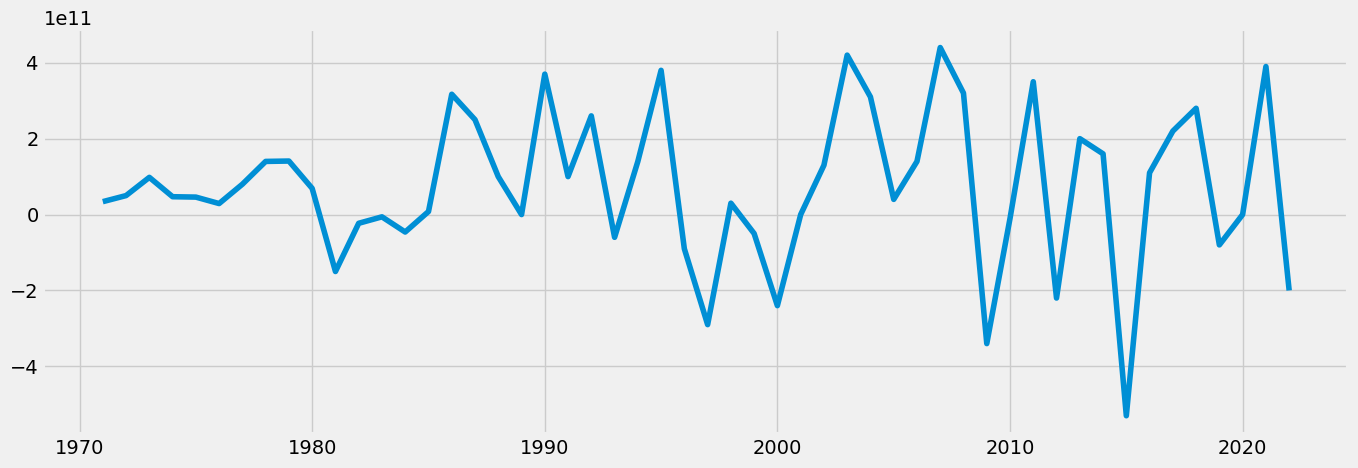

In [24]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)
# Save the decomposition plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visuals', 'gdp_bavaria_stationary.png'))

# Display the plot
plt.show()


After stationarizing the data by the differencing technique, there is no longer a trend. The data seems of a stationary nature. 

In [25]:
# Running the Dickey Fuller test after stationarizing data
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.582529
p-value                         0.006104
Number of Lags Used             2.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


The test statistic (-3.5) is smaller than the critical value (5% = -2.9), thus I can reject null hypothesis. The null hypothesis is that there is a unit root. Additionally, the test result is significant, since the p-value is smaller than 0.05. The GDP is now stationary.

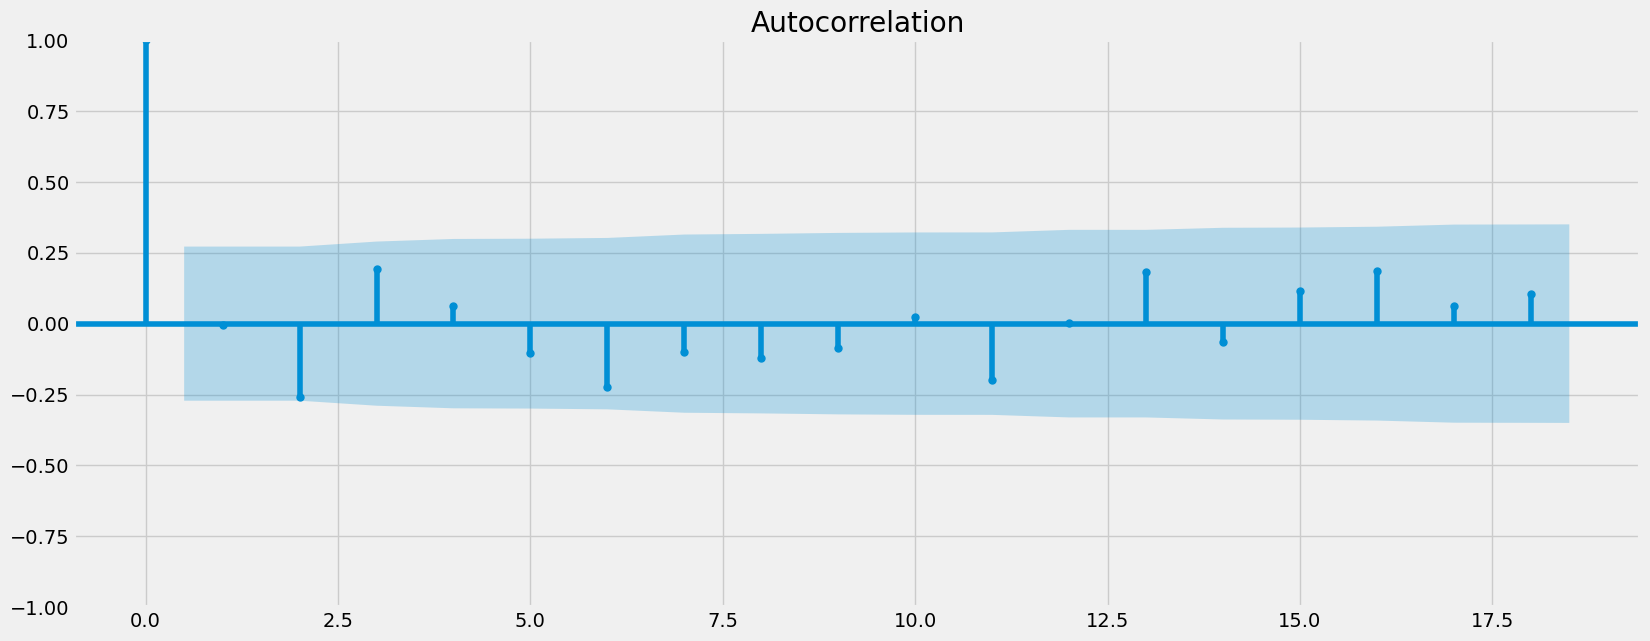

In [26]:
plot_acf(data_diff)
# Save the decomposition plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visuals', 'autocorrelation_gdp_bavaria_stationary.png'))

# Display the plot
plt.show()

In this autocorrelation test, there is a single line that goes above the blue edge of the confidence interval, this means that my data does not have lags that are significantly correlated with each other. Thus, I can deduce that my data is stationary. This observation together with the Dickey-Fuller test proves beyond doubt that after applying the differencing technique, this GDP data is NOW of stationary nature.

# 5. Data driven insights

The original GDP data for Germany initially exhibited a stationary nature, as evidenced by the Dickey-Fuller test not rejecting the null hypothesis. However, the autocorrelation test indicated some light nuances in the stationary characteristics. Following the application of differencing techniques to enhance stationarity, both the Dickey-Fuller test and an improved autocorrelation analysis unequivocally established that the GDP is non-stationary. This transformation positions the dataset for the implementation of a robust forecasting model.